In [3]:
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook');

Markdown e<sup>x</sup>

In [2]:
import string
letters = string.ascii_lowercase
letters

'abcdefghijklmnopqrstuvwxyz'

In [3]:
counts = { k:0 for k in letters }
counts

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 0,
 'e': 0,
 'f': 0,
 'g': 0,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 0,
 'm': 0,
 'n': 0,
 'o': 0,
 'p': 0,
 'q': 0,
 'r': 0,
 's': 0,
 't': 0,
 'u': 0,
 'v': 0,
 'w': 0,
 'x': 0,
 'y': 0,
 'z': 0}

# Web scraping

In [4]:
import requests

In [5]:
r = requests.get('http://nytimes.com')
type(r)

requests.models.Response

In [6]:
r.text[:100]

'<!DOCTYPE html>\n<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <title'

In [7]:
r = requests.get('https://nytimes.com')
'Florida' in r.text

True

In [8]:
'Brexit' in r.text

False

In [9]:
def innyt(word):
    r = requests.get('http://nytimes.com')
    return word in r.text

In [10]:
innyt('Ireland')

False

url = 'https://www.amazon.com/Vollrath-47934-4-Quart-Economy-Stainless/dp/B000CC1ECE'

In [11]:
# split-and-select for extracting pieces of strings

In [12]:
s = 'some word(s) or other stuff'
s.split('(')
s.split('(')[1]

's) or other stuff'

In [13]:
s = 'some word(s or more) or other stuff'
s.split('(')
s.split('(')[1].split(')')[0]

's or more'

In [14]:
x = 'priceBlockBuyingPriceString">'
url = 'https://www.amazon.com/Vollrath-47934-4-Quart-Economy-Stainless/dp/B000CC1ECE'
r = requests.get(url)
len(r.text)
r

<Response [200]>

In [17]:
requests.get('https://blue.math.buffalo.edu/hello')

ConnectionError: HTTPSConnectionPool(host='blue.math.buffalo.edu', port=443): Max retries exceeded with url: /hello (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x104c0eba8>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [16]:
uas = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
requests.get('https://blue.math.buffalo.edu/hello',
            headers={'User-Agent':uas})

ConnectionError: HTTPSConnectionPool(host='blue.math.buffalo.edu', port=443): Max retries exceeded with url: /hello (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x104c0e2b0>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [18]:
uas = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
x = 'priceBlockBuyingPriceString">'
url = 'https://www.amazon.com/Vollrath-47934-4-Quartz-Economy-Stainless/dp/B000CC1ECE'
r = requests.get(url, headers={'User-Agent':uas})
r

<Response [200]>

In [19]:
'7.92' in r.text

True

In [20]:
x = 'priceBlockBuyingPriceString">'
len(r.text.split(x))

2

In [21]:
r.text.split(x)[1].split('<')[0]

'$7.79'

In [24]:
r.text.split(x)[1].split('<')[0][1:].replace(',','')

'7.79'

In [25]:
float(r.text.split(x)[1].split('<')[0][1:].replace(',',''))

7.79

In [26]:
def getprice(productid):
        uas = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
        x = 'priceBlockBuyingPriceString">'
        url = 'https://www.amazon.com/dp/' + productid
        r = requests.get(url, headers={'User-Agent': uas})
        return float(r.text.split(x)[1].split('<')[0][1:].replace(',',''))

In [27]:
getprice('B000CC1ECE')

7.79

In [28]:
getprice('B07GD4CMDH')

725.34

In [29]:
getprice('B07MW5WKC1')

2742.23

In [30]:
'mississippi'.replace('s','')

'miiippi'

In [31]:
'buffalo'.replace('s','')

'buffalo'

In [1]:
d = {'last letter': ['x','y','z'], 'log10 f/m':[.3,.01,-.2]}
df = pd.DataFrame(d)
df

NameError: name 'pd' is not defined

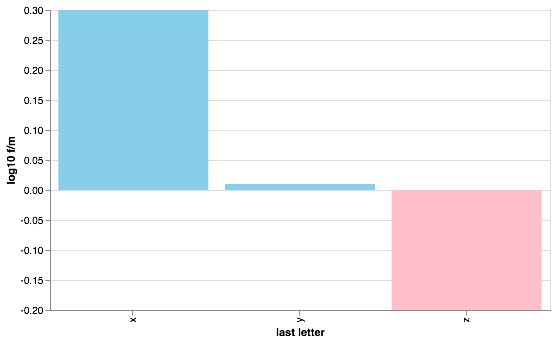

In [8]:
alt.Chart( df, width = 500).mark_bar().encode(x='last letter', y='log10 f/m',
                                             color = alt.condition(
                        alt.datum['log10 f/m'] > 0,
                        alt.value("skyblue"),
                        alt.value("pink")  )
                                                     )

In [ ]:
import 'names/'